# Coût du travail et salaire net

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

from openfisca_core import periods

import csv
#import pandas as pd

import datetime
import openfisca_france 




In [2]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # module décrivant le système socio-fiscal français
tax_benefit_system = openfisca_france.FranceTaxBenefitSystem()
# TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
# tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

In [3]:
# to debug / trace
#from openfisca_core import tools
#from openfisca_core.reforms import Reform

In [4]:
year = 2016
period = "{}-01".format(year)
salaire_minimal = 1
salaire_max = 5000


In [5]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 15,
            min = salaire_minimal,
            max = salaire_max,
            name = 'salaire_de_base',
            ),
        ],
    period = period,
    parent1 = dict(
        # birth = date(1980, 1, 1),
        # type_sal = 1,
        taille_entreprise = 0,
        #exposition_accident = 2,
        allegement_cotisation_allocations_familiales_mode_recouvrement = 1,
        allegement_fillon_mode_recouvrement = 2,
        ),
    )  #.new_simulation(debug = "true")
       




In [6]:
from openfisca_core import tools
print(tools.get_trace_tool_link(simulation, ['cotisations_employeur'], api_url='https://api.openfisca.fr/', trace_tool_url='https://www.openfisca.fr/tools/trace'))

https://www.openfisca.fr/tools/trace?api_url=https%3A%2F%2Fapi.openfisca.fr%2F&simulation=%7B%22scenarios%22%3A+%5B%7B%22axes%22%3A+%5B%5B%7B%22count%22%3A+15%2C+%22index%22%3A+0%2C+%22name%22%3A+%22salaire_de_base%22%2C+%22min%22%3A+1%2C+%22max%22%3A+5000%2C+%22period%22%3A+null%7D%5D%5D%2C+%22period%22%3A+%222016-01%22%2C+%22test_case%22%3A+%7B%22familles%22%3A+%5B%7B%22id%22%3A+0%2C+%22parents%22%3A+%5B%22ind0%22%5D%7D%5D%2C+%22foyers_fiscaux%22%3A+%5B%7B%22id%22%3A+0%2C+%22declarants%22%3A+%5B%22ind0%22%5D%7D%5D%2C+%22individus%22%3A+%5B%7B%22id%22%3A+%22ind0%22%2C+%22taille_entreprise%22%3A+0%2C+%22allegement_cotisation_allocations_familiales_mode_recouvrement%22%3A+1%2C+%22allegement_fillon_mode_recouvrement%22%3A+2%7D%5D%2C+%22menages%22%3A+%5B%7B%22id%22%3A+0%2C+%22personne_de_reference%22%3A+%22ind0%22%7D%5D%7D%7D%5D%2C+%22variables%22%3A+%5B%22cotisations_employeur%22%5D%7D


In [7]:
simulation1 = simulation.new_simulation()

## Salaires superbut, brut, net et revenu disponible

In [8]:
salaire_super_brut = simulation1.calculate('salaire_super_brut')
salaire_brut = simulation1.calculate('salaire_de_base')
salaire_net = simulation1.calculate('salaire_net')
salaire_net_a_payer = simulation1.calculate('salaire_net_a_payer')
salaire_imposable = simulation1.calculate('salaire_imposable')
allegement_fillon = simulation1.calculate('allegement_fillon')
cice = simulation1.calculate('credit_impot_competitivite_emploi')
acaf = simulation1.calculate('allegement_cotisation_allocations_familiales')
acaf


array([  1.79999992e-02,   6.44528580e+00,   1.28725719e+01,
         1.92998562e+01,   2.57271442e+01,   3.21544304e+01,
         3.85817108e+01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00], dtype=float32)

In [9]:
#import numpy as np
#import pandas as pd
#pd.DataFrame(np.array([[2,3],[4,5],['pascaline', 'huguette']]), columns = ['essai','erreur'], index = [2,3, 'jambon'])

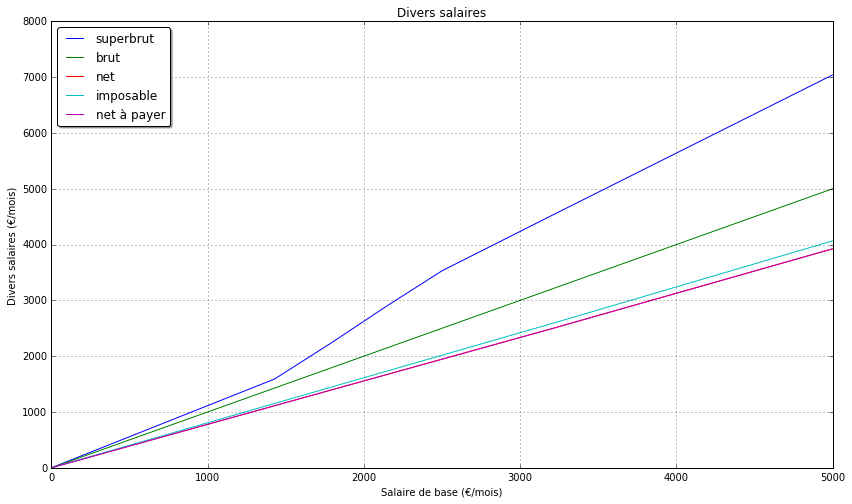

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(salaire_brut, salaire_super_brut, label = "superbrut")
plt.plot(salaire_brut, salaire_brut, label = "brut")
plt.plot(salaire_brut, salaire_net, label = "net")
plt.plot(salaire_brut, salaire_imposable, label = "imposable")
plt.plot(salaire_brut, salaire_net_a_payer, label = u"net à payer")
plt.xlabel(u'Salaire de base (€/mois)')
plt.ylabel(u'Divers salaires (€/mois)')
plt.title(u'Divers salaires')
plt.legend(loc = 0, shadow=True, fancybox=True)
plt.grid()

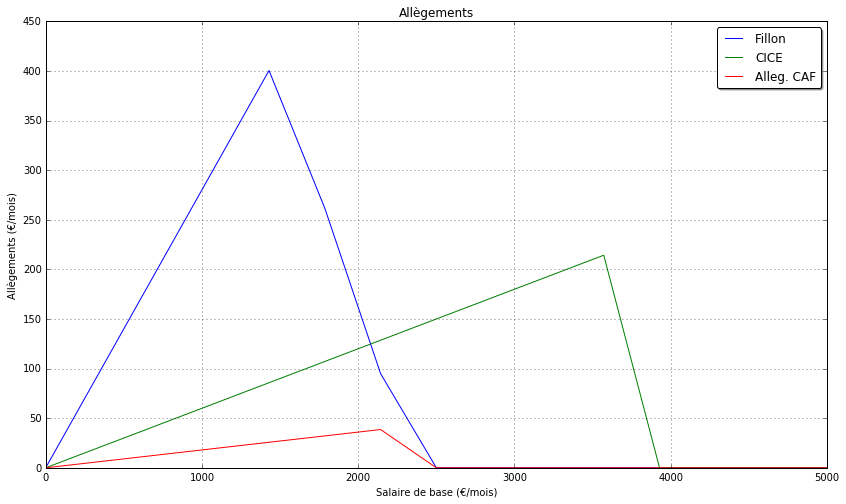

In [11]:
fig, ax = plt.subplots(figsize=(14, 8))
#fig = plt.figure()
plt.plot(salaire_brut, allegement_fillon, label = "Fillon")
plt.plot(salaire_brut, cice, label = "CICE")
plt.plot(salaire_brut, acaf, label = "Alleg. CAF")
plt.xlabel(u'Salaire de base (€/mois)')
plt.ylabel(u'Allègements (€/mois)')
plt.title(u'Allègements')
plt.legend(loc = 0, shadow=True, fancybox=True)
plt.grid()

In [12]:
i = 0
print "Sup_brut","", "Brut"," ", "Net", " ", "a payer", "", "imposable", "", "Fillon", " ", "CICE"

while i < 15:                                                                                                 
    print round(salaire_super_brut[i],0),"  ", round(salaire_brut[i],0),"  ", round(salaire_net[i],0), " ", round(salaire_net_a_payer[i],2), " ", 
    round(salaire_imposable[i],0), " " ,round(allegement_fillon[i],0), " ", round(cice[i],0)
    i = i + 1


Sup_brut  Brut   Net   a payer  imposable  Fillon   CICE
1.0    1.0    1.0   0.78   399.0    358.0    279.0   278.73   796.0    715.0    557.0   556.68   1194.0    1072.0    835.0   834.62   1592.0    1429.0    1113.0   1112.56   2228.0    1786.0    1390.0   1390.5   2893.0    2143.0    1668.0   1668.44   3530.0    2501.0    1946.0   1946.4   4034.0    2858.0    2224.0   2224.35   4539.0    3215.0    2502.0   2502.28   5039.0    3572.0    2787.0   2786.6   5539.0    3929.0    3071.0   3070.96   6040.0    4286.0    3355.0   3355.34   6540.0    4643.0    3640.0   3639.71   7041.0    5000.0    3924.0   3924.08  


In [13]:
cotsoc_acc = simulation1.calculate('arrco_salarie')
cotsoc_acc

array([ -2.99999993e-02,  -1.11000004e+01,  -2.21700001e+01,
        -3.32400017e+01,  -4.43100014e+01,  -5.53800011e+01,
        -6.64499969e+01,  -7.75199966e+01,  -8.85800018e+01,
        -9.96500015e+01,  -1.28410004e+02,  -1.57330002e+02,
        -1.86259995e+02,  -2.15179993e+02,  -2.44100006e+02], dtype=float32)

In [14]:
taux_employe = 1 - salaire_net / salaire_brut  
taux_employeur = salaire_super_brut / salaire_brut - 1 
taux_employe

array([ 0.21839994,  0.22158742,  0.22157896,  0.2215941 ,  0.22159463,
        0.22160059,  0.22160453,  0.22159541,  0.22159547,  0.22159874,
        0.21981531,  0.21834302,  0.21711373,  0.21607357,  0.21518397], dtype=float32)

In [15]:
print (salaire_super_brut[:5] /salaire_brut[:5]) - 1
print salaire_super_brut[-5:]
print salaire_brut[-5:]

taux_employeur


[ 0.11679995  0.11364818  0.11364377  0.11366093  0.11365557]
[ 5039.06982422  5539.44726562  6039.81494141  6540.20263672  7040.60009766]
[ 3571.71435547  3928.78564453  4285.85693359  4642.92871094  5000.        ]


array([ 0.11679995,  0.11364818,  0.11364377,  0.11366093,  0.11365557,
        0.24736917,  0.34955955,  0.41185665,  0.41185796,  0.41185904,
        0.41082668,  0.4099642 ,  0.40924323,  0.40863729,  0.40812004], dtype=float32)

(0, 0.5)

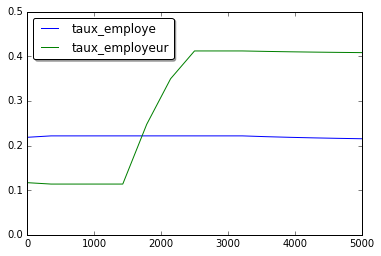

In [16]:
fig = plt.figure()
plt.plot(salaire_brut, taux_employe, label = "taux_employe")
plt.plot(salaire_brut, taux_employeur, label = "taux_employeur")
plt.legend(loc = 0, shadow=True, fancybox=True)
plt.ylim([0,.5])

In [17]:
cotisations_employeur = simulation1.calculate('cotisations_employeur')
i = 0
print "cotisations_employeur"
cotisations_employeur = simulation1.calculate('cotisations_employeur')
while i < 15:                                                                                                 
    print round(cotisations_employeur[i],4)
    i = i + 1

cotisations_employeur
-0.415
-147.4711
-294.5271
-441.6032
-588.6593
-735.7453
-882.7914
-1029.8474
-1176.9136
-1323.9796
-1467.3556
-1610.6619
-1753.9579
-1897.2739
-2040.6001


In [18]:
i = 0
print "salaire de base"
salaire_de_base = simulation1.calculate('salaire_de_base')
while i < 15:                                                                                                 
    print round(salaire_de_base[i],4)
    i = i + 1





salaire de base
1.0
358.0714
715.1429
1072.2142
1429.2858
1786.3572
2143.4285
2500.5
2857.5715
3214.6428
3571.7144
3928.7856
4285.8569
4642.9287
5000.0


In [19]:
#simulation1.calculate('cotisations_employeur') / simulation1.calculate('salaire_de_base')
ratio = cotisations_employeur / salaire_de_base
print ratio

[-0.41500002 -0.41184819 -0.41184375 -0.41186097 -0.41185558 -0.41186908
 -0.41185954 -0.41185659 -0.41185796 -0.41185901 -0.41082668 -0.40996429
 -0.40924323 -0.40863732 -0.40812001]


In [20]:

from openfisca_core import tools
print(tools.get_trace_tool_link(simulation, ['cotisations_employeur'], api_url='https://api.openfisca.fr/', trace_tool_url='https://www.openfisca.fr/tools/trace'))

https://www.openfisca.fr/tools/trace?api_url=https%3A%2F%2Fapi.openfisca.fr%2F&simulation=%7B%22scenarios%22%3A+%5B%7B%22axes%22%3A+%5B%5B%7B%22count%22%3A+15%2C+%22index%22%3A+0%2C+%22name%22%3A+%22salaire_de_base%22%2C+%22min%22%3A+1%2C+%22max%22%3A+5000%2C+%22period%22%3A+null%7D%5D%5D%2C+%22period%22%3A+%222016-01%22%2C+%22test_case%22%3A+%7B%22familles%22%3A+%5B%7B%22id%22%3A+0%2C+%22parents%22%3A+%5B%22ind0%22%5D%7D%5D%2C+%22foyers_fiscaux%22%3A+%5B%7B%22id%22%3A+0%2C+%22declarants%22%3A+%5B%22ind0%22%5D%7D%5D%2C+%22individus%22%3A+%5B%7B%22id%22%3A+%22ind0%22%2C+%22taille_entreprise%22%3A+0%2C+%22allegement_cotisation_allocations_familiales_mode_recouvrement%22%3A+1%2C+%22allegement_fillon_mode_recouvrement%22%3A+2%7D%5D%2C+%22menages%22%3A+%5B%7B%22id%22%3A+0%2C+%22personne_de_reference%22%3A+%22ind0%22%7D%5D%7D%7D%5D%2C+%22variables%22%3A+%5B%22cotisations_employeur%22%5D%7D


In [21]:
i = 0
print "Cot. malad. sal."
cot_mal_sal = simulation1.calculate('mmid_salarie')
while i < 15:                                                                                                 
    print round(cot_mal_sal[i],4)
    i = i + 1



Cot. malad. sal.
-0.01
-2.69
-5.36
-8.04
-10.72
-13.4
-16.08
-18.75
-21.43
-24.11
-26.79
-29.47
-32.14
-34.82
-37.5


In [22]:

i = 0
print "contribution_exceptionnelle_solidarite"
contribution_exceptionnelle_solidarite = simulation1.calculate('contribution_exceptionnelle_solidarite')
while i < 15:                                                                                                 
    print round(contribution_exceptionnelle_solidarite[i],4)
    i = i + 1

contribution_exceptionnelle_solidarite
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0


In [23]:

i = 0
print "cotisations_salariales_non_contributives"
cotisations_salariales_non_contributives = simulation1.calculate('cotisations_salariales_non_contributives')
while i < 15:                                                                                                 
    print round(cotisations_salariales_non_contributives[i],4)
    i = i + 1

cotisations_salariales_non_contributives
-0.01
-2.69
-5.36
-8.04
-10.72
-13.4
-16.08
-18.75
-21.43
-24.11
-26.79
-29.47
-32.14
-34.82
-37.5


In [24]:
i = 0
print "cotisations_salariales_contributives"
cotisations_salariales_contributives = simulation1.calculate('cotisations_salariales_contributives')
while i < 15:                                                                                                 
    print round(cotisations_salariales_contributives[i],4)
    i = i + 1

cotisations_salariales_contributives
-0.13
-48.51
-96.89
-145.28
-193.66
-242.05
-290.44
-338.81
-387.19
-435.58
-477.59
-519.55
-561.5099
-603.46
-645.42


In [25]:
contrib_salariales = cotisations_salariales_contributives + cotisations_salariales_non_contributives

i = 0
print "contrib_salariales"
while i < 15:                                                                                                 
    print round(contrib_salariales[i],4)
    i = i + 1


contrib_salariales
-0.14
-51.2
-102.25
-153.32
-204.38
-255.45
-306.52
-357.56
-408.62
-459.69
-504.38
-549.02
-593.65
-638.28
-682.92


In [26]:
cotisations_salariales = simulation1.calculate('cotisations_salariales')
i = 0
print "cotisations salariales"

while i < 15:                                                                                                 
    print round(cotisations_salariales[i],4)
    i = i + 1


cotisations salariales
-0.14
-51.2
-102.25
-153.32
-204.38
-255.45
-306.52
-357.56
-408.62
-459.69
-504.38
-549.02
-593.65
-638.28
-682.92
